In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import numpy as np
import seaborn as sns

/tmp/ipykernel_3103685/1689849461.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# settings for the plots,
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  

In [3]:
def read_train_loss(PATH):
    with open(PATH, 'r') as file:
        lines = file.readlines()
        
        lines=[line for line in lines if line.startswith("[")]
        lines = [line.strip() for line in lines]   
    lines_new=[float(re.findall(r"Loss:(\d+\.\d+)", item)[0]) for item in lines]
    return lines_new

def read_validation_score(PATH):
    resdict={"image ROCAUC":[],"unalign image ROCAUC":[],"pixel ROCAUC":[],"unalign pixel ROCAUC":[]}
    with open(PATH, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]     

    for key in resdict.keys():
        pattern = f"{key}"+r':\s*(\d+\.\d+)'
        lines_new=[]
        for line in lines:
            match = re.search(pattern, line)  
            if match:
                lines_new.append(match.group(1))       
        lines_new=[float(item) for item in lines_new]          
        resdict[key]=lines_new
    return resdict

def get_categories_from_run_path(PATH):
    regex_pattern = r'-(\w+)$'
    extracted_categories = [re.search(regex_pattern, category).group(1) for category in list(os.listdir(PATH))]
    extracted_categories=list(set(extracted_categories))
    
    return extracted_categories

def plot_losses(RESPATH,dataset,run,experiment):
    
    RUN_PATH= os.path.join(RESPATH, dataset,run)
    categories=get_categories_from_run_path(RUN_PATH)
    for category in categories:
        ARGS_PATH= os.path.join(RUN_PATH, experiment+ f'{category}', "args.log")
        losses=read_train_loss(ARGS_PATH)
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.axhline(y=0.01, color='r', linestyle='dotted')
        plt.title(f'Training Loss {category},{experiment}')
        plt.show()


def get_vals_per_category(RESPATH,dataset,run,experiment):
    RUN_PATH= os.path.join(RESPATH, dataset,run)
    categories=get_categories_from_run_path(RUN_PATH)
    print(categories)
    resdict={}
    for category in categories:
        VALS_PATH = os.path.join(RESPATH, dataset, run, experiment + f'{category}', "validation_result.log")
        if not os.path.exists(VALS_PATH):
            continue
        valdict = read_validation_score(VALS_PATH)
        resdict[category]=valdict
    return resdict

def plot_vals_per_category(RESPATH,dataset,run,experiment):

    resdict=get_vals_per_category(RESPATH,dataset,run,experiment)
    data_for_df = []
    for cls, metrics in resdict.items():
        for metric, values in metrics.items():
            value = values[0] if values else np.nan  # Assign NaN if the list is empty
            data_for_df.append({'Class': cls, 'Metric': metric, 'Value': value})
    df = pd.DataFrame(data_for_df)

    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Class', y='Value', hue='Metric', data=df)
    for p in bar_plot.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with a height greater than 0
            bar_plot.annotate(format(height, '.2f'),  # Format the value
                                (p.get_x() + p.get_width() / 2., height),  # Position
                                ha = 'center', va = 'center',  # Alignment
                                xytext = (0, 9),  # Distance from the bar
                                textcoords = 'offset points')

    plt.title(f' {experiment}  ,{run}'),plt.xlabel('Class'),plt.ylabel('Value'),plt.legend(title='Metric', loc='lower right'),plt.show()

def plot_vals_per_category_and_contamination(RESPATH,dataset,experiment,category,contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"],metric="image ROCAUC"):
    contam_list=[int(item.split("_")[-1]) for item in contam_dir_list]
    metric_list=[]
    for run in contam_dir_list:
        PATH= os.path.join(RESPATH, dataset,run,experiment+ f'{category}', "validation_result.log")
        resdict=read_validation_score(PATH)
        metric_list.append(resdict[metric][0])
    plt.ylim(0.5,1.1)
    plt.grid()
    plt.plot(contam_list,metric_list)
    plt.xlabel('Contamination in %' ),plt.ylabel(f'{metric}'),plt.title(f'{experiment}  ,{category}'),plt.show()

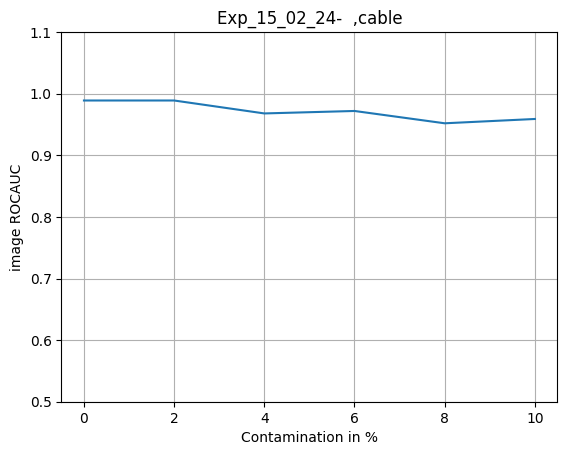

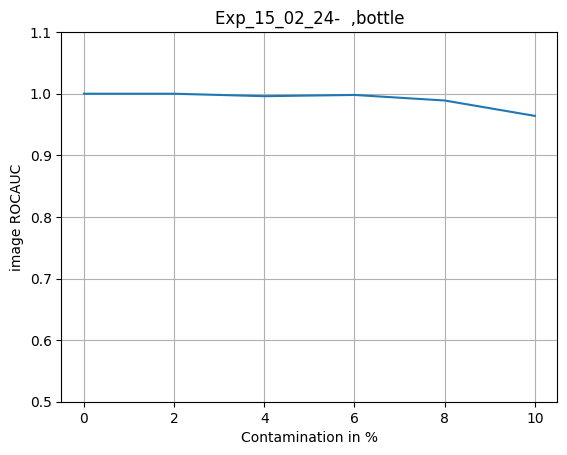

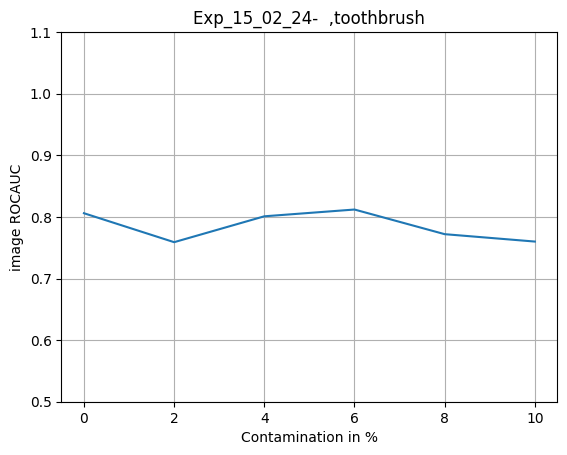

In [4]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")

['cable', 'leather', 'metal_nut', 'bottle', 'toothbrush', 'screw']


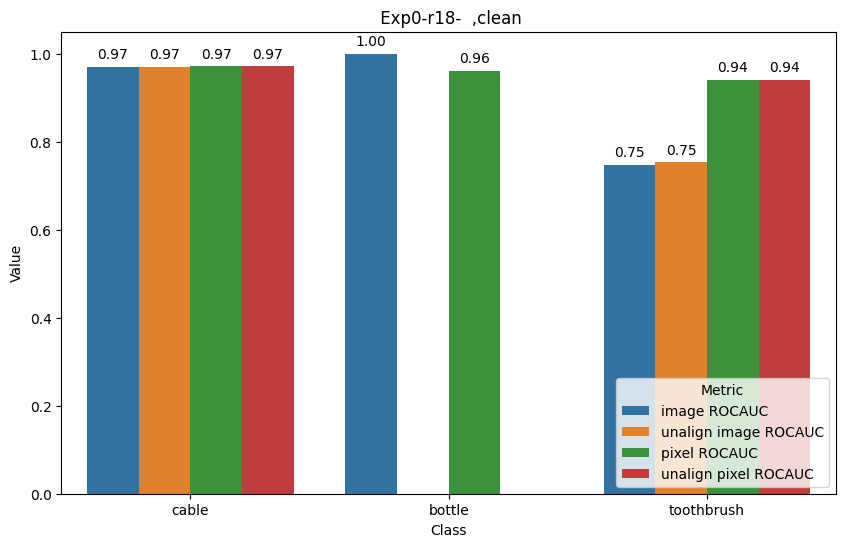

['cable', 'leather', 'bottle', 'toothbrush']


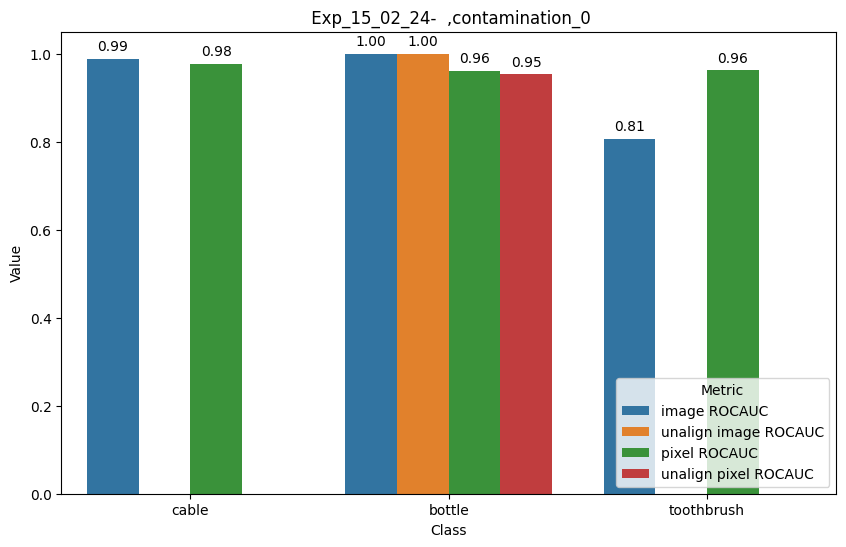

['cable', 'bottle', 'toothbrush']


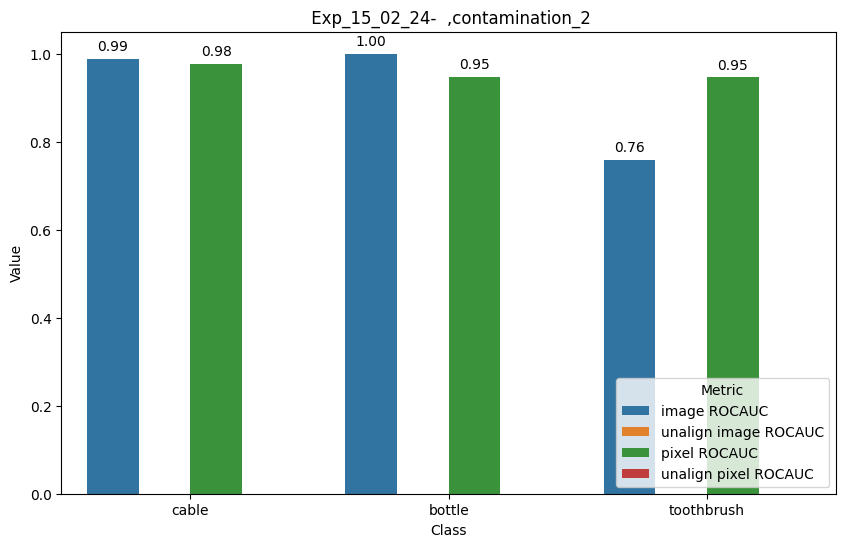

['cable', 'bottle', 'toothbrush']


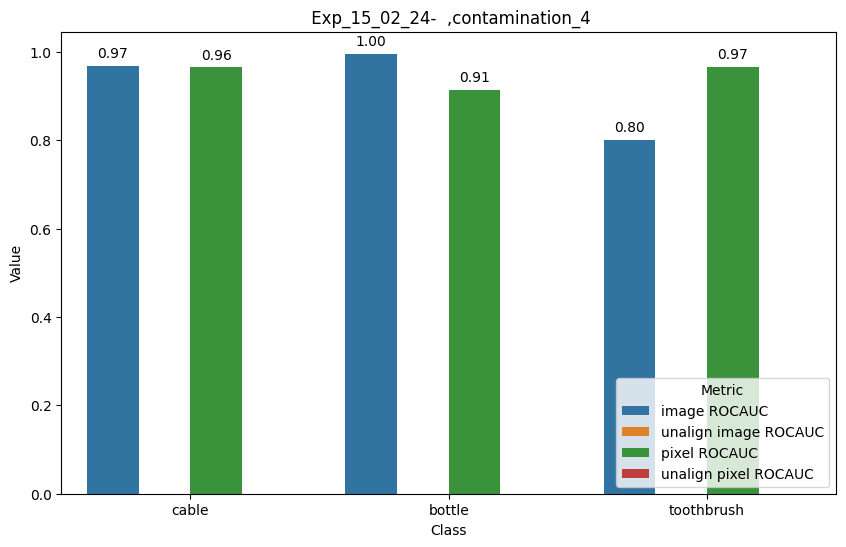

['cable', 'bottle', 'toothbrush']


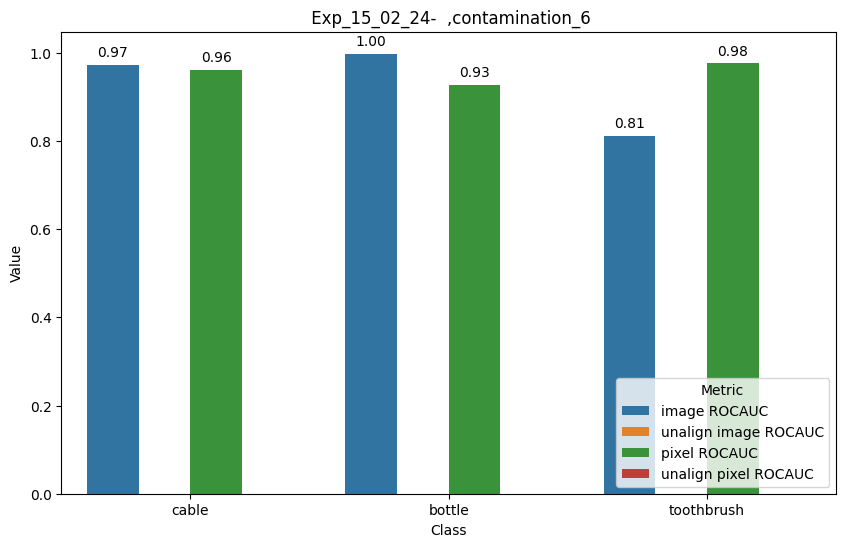

['cable', 'bottle', 'toothbrush']


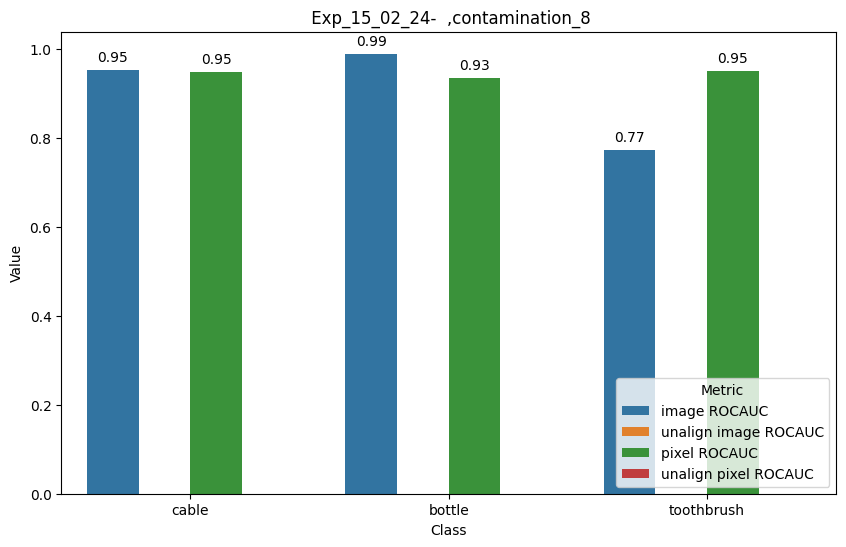

['cable', 'bottle', 'toothbrush']


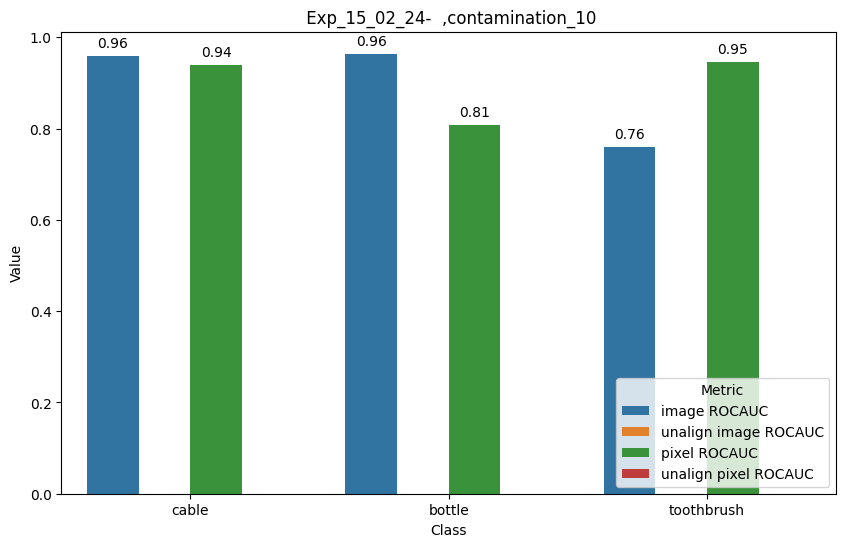

In [6]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

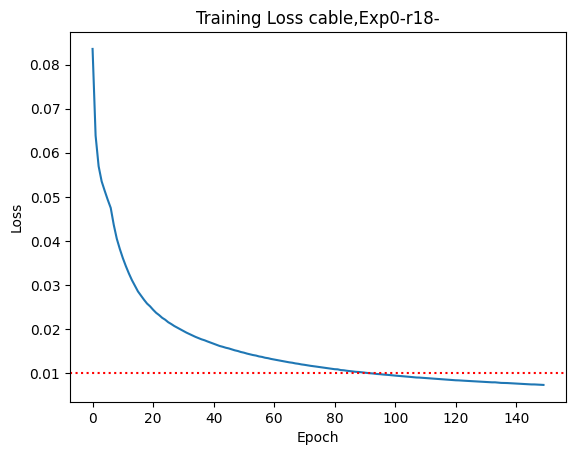

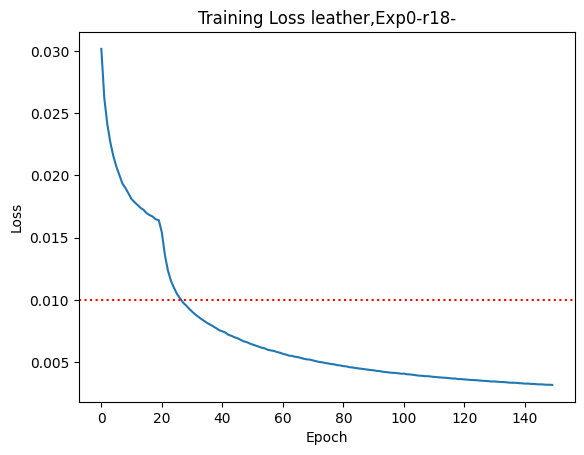

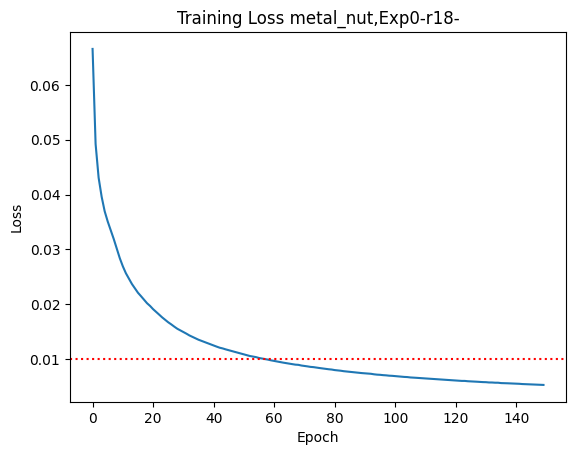

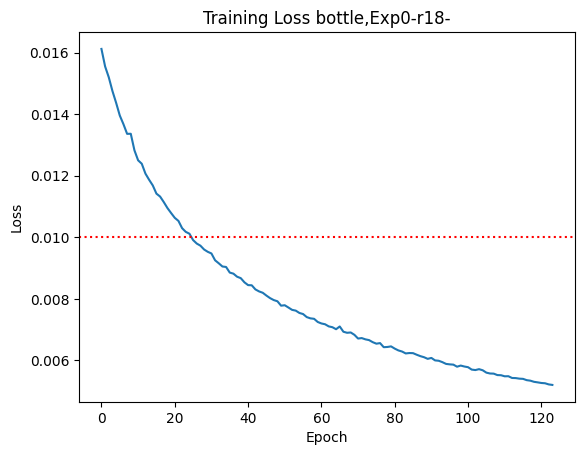

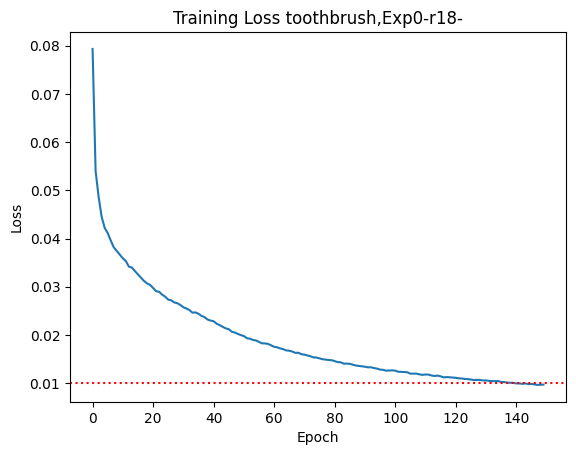

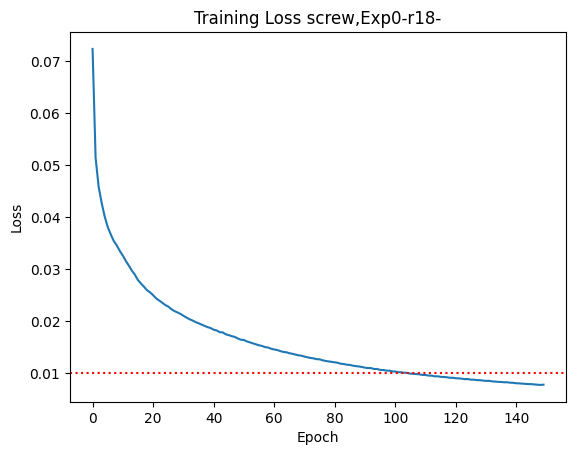

In [7]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

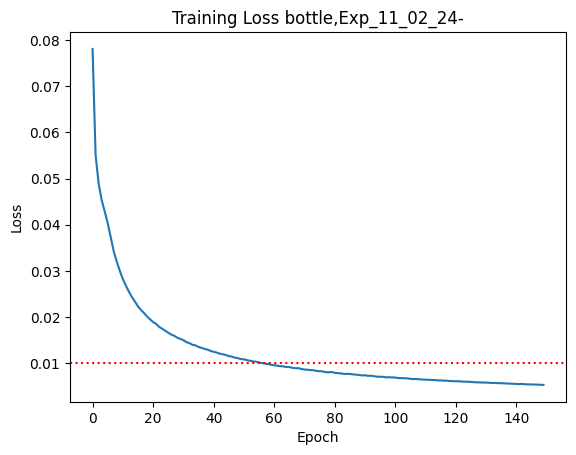

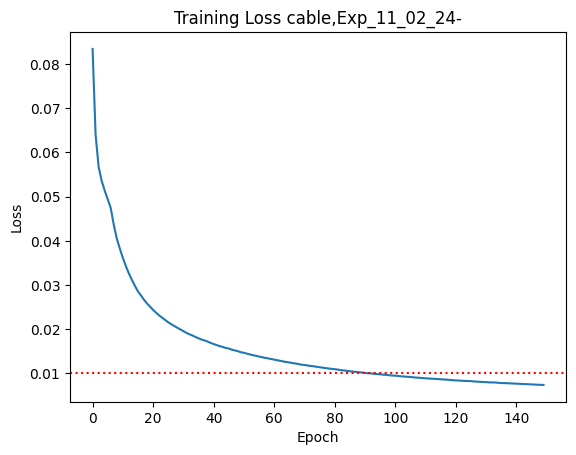

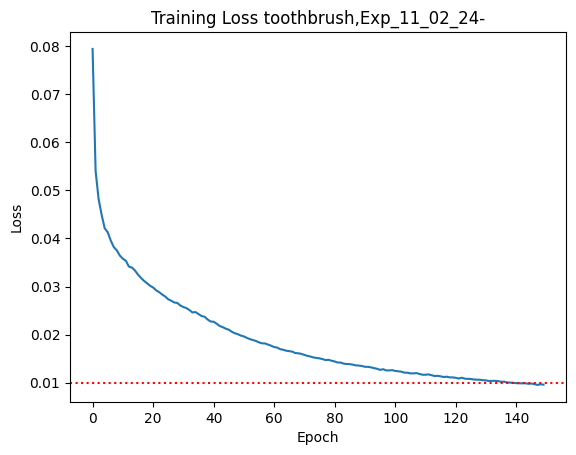

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

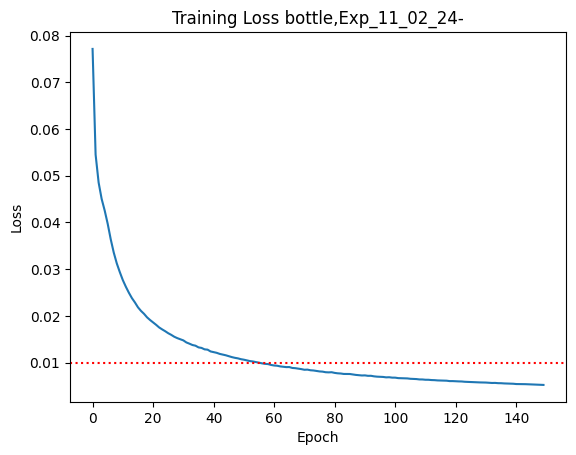

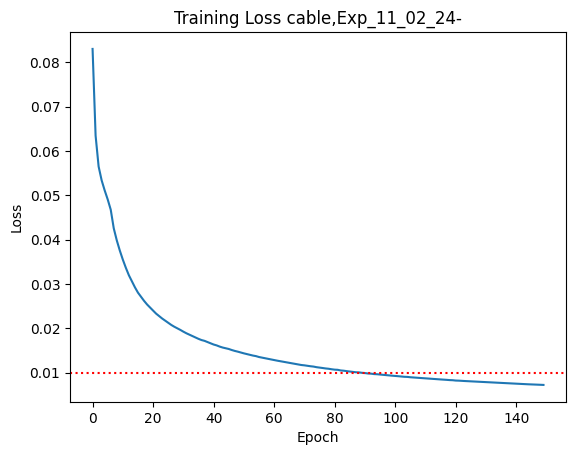

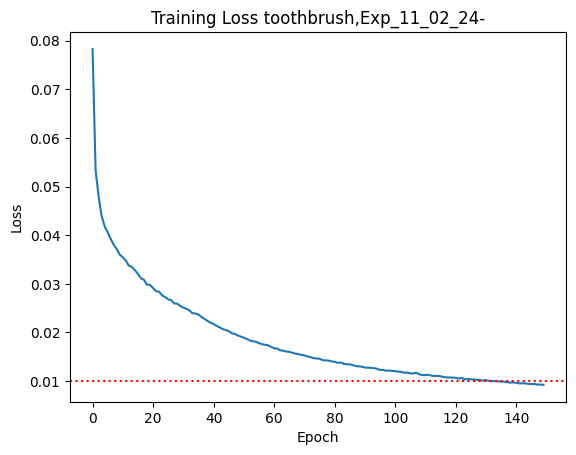

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")